## **Розширені алгоритми прогнозування за допомогою нейронних мереж на прикладах медичних даних**

## Roman Kovalchuk. KN-314
### Варіант №9. Реалізувати прогнозування поширення COVID-19 у групі країн Індія, Непал, Пакистан.

## Мета роботи

Ця лабораторна робота присвячена прогнозуванню динаміки поширення COVID-19 у світі за допомогою нейронних мереж різних структур. Мета роботи навчитисяч робити прогнози на основі лінійної регресії, зворотного розповсюдження та нейронних мереж довгої короткочасної пам’яті (long short-term memory LSTM).

## Виконання

Сьогодні існує багато відкритих даних про поширення COVID-19 у світі. Однак представлено небагато інструментів для прогнозування цих процесів. Ця лабораторна робота покаже, як можна завантажувати дані з відкритих джерел, виконувати попередній аналіз даних, перетворювати та очищати дані, виконувати кореляційний та затримковий аналіз.

Далі будуть розглянуті три різні математичні моделі для розрахунку прогнозування.

Для цього буде продемонстровано поділ набору даних на навчальні та тестові вибірки. Буде продемонстровно як нормалізувати дані та провести попередній аналіз. Буде показано, як побудувати моделі та набори даних для використання двох різних нейронних мереж. Наступним кроком є побудова прогнозу та порівняння точності та адекватності отриманих моделей.

## Матеріали та методи

У цій лабораторній роботі буде вивчено основні методи прогнозування часових рядів. Лабораторна робота складається з таких етапів:
* Завантаження та попередній аналіз даних
* Лінійна регресія
* Метод зворотного поширення помилки (Back Propagation NN)
* Довгої короткочасної пам’яті - LSTM

На першому етапі буде показано, як завантажити дані та заздалегідь підготувати їх до аналізу:
* завантажити дані
* змінити типи даних стовпців
* фільтрація рядків
* усунення відсутніх даних
* перетворення набору даних
* нормалізація даних

Під час наступних кроків буде продемонстрованмо три різні моделі прогнозування часових рядів.

Статистичні дані отримані з https://ourworldindata.org/coronavirus на основі Creative Commons BY license.

## Завантаження бібліотек

Необхідне встановлення додаткових бібліотек для виконання лабораторної роботи.

In [1]:
!pip install keras

  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)


In [2]:
!pip install tensorflow

^C


## Завантаження та попередній аналіз даних

### Завантаження даних

Перед початком необхідно імпортувати додаткові бібліотеки.

In [3]:
import pandas as pd
import numpy as np

Будемо використовувати той самий набір даних, що і в попередній лабораторній роботі. 
Тому повторюємо  попередню обробку даних, як це було раніше у лабораторній роботі 2.

In [4]:
covid_stat = pd.read_csv('./datasets/owid-covid-data.csv')
covid_stat

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125956,ZWE,Africa,Zimbabwe,2021-10-20,132437.0,32.0,47.000,4659.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125957,ZWE,Africa,Zimbabwe,2021-10-21,132540.0,103.0,41.286,4662.0,3.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125958,ZWE,Africa,Zimbabwe,2021-10-22,132588.0,48.0,43.286,4663.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125959,ZWE,Africa,Zimbabwe,2021-10-23,132588.0,0.0,36.429,4663.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Давайте вивчимо наш набір даних. Він складається з 125961 rows × 65 columns. 
Перші 3 стовпці містять географічну інформацію. Графа 4 - дата вимірювання. 
Ще 55 - дані про COVID -19. Також у наборі даних спостерігаються деякі відсутні дані. 
Ми повинні бути впевнені, що Python правильно розпізнав типи даних. Для цього ми повинні використовувати **[pandas.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)**.

In [5]:
covid_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125961 entries, 0 to 125960
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 125961 non-null  object 
 1   continent                                120257 non-null  object 
 2   location                                 125961 non-null  object 
 3   date                                     125961 non-null  object 
 4   total_cases                              119154 non-null  float64
 5   new_cases                                119150 non-null  float64
 6   new_cases_smoothed                       118136 non-null  float64
 7   total_deaths                             108218 non-null  float64
 8   new_deaths                               108371 non-null  float64
 9   new_deaths_smoothed                      118136 non-null  float64
 10  total_cases_per_million         

Бачимо, 54 стовпці даних COVID-19 були розпізнані правильно (float64).
Перші 4 стовпці та одиниці тесту були визнані об’єктами. Давайте дослідимо їх:

In [6]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_stat[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
125956,ZWE,Africa,Zimbabwe,NaN
125957,ZWE,Africa,Zimbabwe,NaN
125958,ZWE,Africa,Zimbabwe,NaN
125959,ZWE,Africa,Zimbabwe,NaN


In [7]:
# covid_stat['tests_units'].count() + covid_stat['tests_units'].isna().sum()

Необхідно відобразити інформацію про поле дата.

In [8]:
covid_stat['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
125956    2021-10-20
125957    2021-10-21
125958    2021-10-22
125959    2021-10-23
125960    2021-10-24
Name: date, Length: 125961, dtype: object

### Зміна типів стовпців

As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **[pandas.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype)**.
Поле "дата" слід перетворити на тип DateTime   **[pandas.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)**. Для перегляду результатів можна використати наступний код.

In [9]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_stat[fields] = covid_stat[fields].astype('category')
covid_stat.loc[:, 'date'] = pd.to_datetime(covid_stat['date'])
covid_stat[fields].describe()

,iso_code,continent,location,tests_units
count,125961,120257,125961,66853
unique,233,6,233,4
top,MEX,Africa,Mexico,tests performed
freq,663,31837,663,42022


In [10]:
covid_stat['tests_units'].cat.categories

Index(['people tested', 'samples tested', 'tests performed', 'units unclear'], dtype='object')

### Фільтрація рядків

Бачимо, що набір даних містить інформацію про 6 континентах та 233 країнах. Поле "test_units" складається з 4 категорій. Щоб показати список країн, треба використати **[pandas.Series.cat.categories](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.categories.html)**.

In [11]:
covid_stat['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=233)

Дослідимо динаміку нових випадків COVID-19 для окремої країни. Будемо використовувати Україну для збереження моделей та подальшого прогнозу. 
Вибір країн здійснюємо згідно індивідуального завдання. 
Використовуємо для цього фільтр pandas.


In [12]:
covid_stat.index = covid_stat['date']

In [13]:
# covid_stat.index

In [14]:
list_of_values = ["India", "Pakistan", "Nepal"]
c_covid = covid_stat[covid_stat['location'].isin(list_of_values)]

c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-01-31,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-01,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-02,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-03,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-20,PAK,Asia,Pakistan,2021-10-20,1266826.0,622.0,734.429,28328.0,16.0,18.143,...,2.8,36.7,59.607,0.60,67.27,0.557,NaN,NaN,NaN,NaN
2021-10-21,PAK,Asia,Pakistan,2021-10-21,1267393.0,567.0,660.286,28344.0,16.0,16.571,...,2.8,36.7,59.607,0.60,67.27,0.557,NaN,NaN,NaN,NaN
2021-10-22,PAK,Asia,Pakistan,2021-10-22,1267945.0,552.0,611.571,28359.0,15.0,15.286,...,2.8,36.7,59.607,0.60,67.27,0.557,NaN,NaN,NaN,NaN


Виберемо поля 'new_cases', 'new_cases_smoothed' для прогнозування. Перш за все, необхідно візуалізувати ці дані.

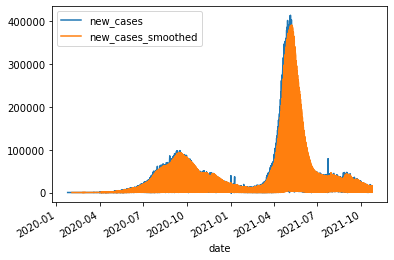

In [16]:
import matplotlib.pyplot as plt


fields = ['new_cases', 'new_cases_smoothed']
c_covid[fields].plot()
plt.show()

###  Видалення пропущених даних

Бачимо, у графіку нових випадків є великі коливання. Спробуємо скласти прогноз для цих хвиль. Перш за все, ми повинні видалити відсутні дані за допомогою [*pandas.DataFrame.dropna()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [17]:
c_covid[fields].isna().sum()

new_cases              0
new_cases_smoothed    15
dtype: int64

In [18]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,new_cases_smoothed
date,,
2020-02-04,0.0,0.429
2020-02-05,0.0,0.429
2020-02-06,0.0,0.286
2020-02-07,0.0,0.286
2020-02-08,0.0,0.286
...,...,...
2021-10-20,622.0,734.429
2021-10-21,567.0,660.286
2021-10-22,552.0,611.571


### Перетворення даних

Якщо ми хочемо зробити прогноз часових рядів, єдине припущення, яке можна зробити - дані на сьогоднішній день залежать від значень попередніх днів. Щоб перевірити чи є залежності, необхідно провести кореляційний аналіз між ними. Для цього потрібно зробити:
1. Дублювання часового ряду даних та переміщення даних вертикально вниз протягом певної кількості днів затримки (lag).
2. Видалення відсутніх даних на початку та в кінці (вони формуються шляхом вертикального зсуву **[pandas.DataFrame.shift()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)**.
3. Обчислення коефіцієнта кореляції між отриманими рядами.

Оскільки цю операцію слід виконувати для різних значень затримки (lag), зручно створити окрему функцію:


In [19]:
def lag_correlation_ts(y, x, lag):
    """
    Lag correlation for 2 DateSeries
    :param y: fixed
    :param x: shifted
    :param lag: lag for shifting
    :return: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

Cтворимо цільовий (target) набір даних.

In [20]:
t_dataset = c_covid['new_cases']
t_dataset

date
2020-02-04      0.0
2020-02-05      0.0
2020-02-06      0.0
2020-02-07      0.0
2020-02-08      0.0
              ...  
2021-10-20    622.0
2021-10-21    567.0
2021-10-22    552.0
2021-10-23    591.0
2021-10-24    698.0
Name: new_cases, Length: 1866, dtype: float64

Протестуємо 30-денну затримку.

     Correlation
Lag             
0         0.2678
1         0.2662
2         0.2648
3         0.2634
4         0.2617
5         0.2598
6         0.2580
7         0.2555
8         0.2515
9         0.2470
10        0.2428
11        0.2384
12        0.2338
13        0.2294
14        0.2246
15        0.2183
16        0.2118
17        0.2058
18        0.1996
19        0.1934
20        0.1874
21        0.1812
22        0.1739
23        0.1666
24        0.1598
25        0.1532
26        0.1466
27        0.1404
28        0.1341
29        0.1269
30        0.1199


<AxesSubplot:xlabel='Lag'>

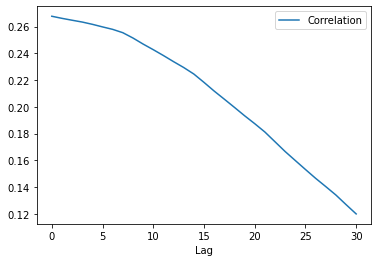

In [21]:
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(t_dataset, t_dataset, 30))  # For time series we should use t_Dataset like input and output
print(l)
l.plot()

Бачимо, що на ділянці затримки спостерігаються деякі хвилі. З таблиці видно, що на кожен сьомий день припадає пік. (Максимальний час затримки: 7, 14, 21 тощо). Це пов'язано з тижневим циклом.
Будь-яку модель прогнозу можна показати у вигляді чорного ящика типу введення-цілі. Цільовими мають бути дані вихідного часового ряду, а вхідними - значення за попередні дні. (Див. рис.1)
Щоб автоматизувати цей процес, давайте зробимо універсальну функцію перетворення часових рядів для створення цього набору даних.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-advanced-prognostication-using-by-neural-networks/FM.png" width="1000" alt="cognitiveclass.ai logo"  />
</center>

Рис.1 Структура моделі прогнозування


Щоб автоматизувати цей процес, треба зробити універсальну функцію перетворення часових рядів для створення цього набору даних.

In [22]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field. If taken into account, the input will start with a lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

Як згадувалося вище, при прогнозуванні часових рядів поля введення та виведення є однаковими, лише зміщуються на затримку (lag).

In [23]:
dataset = series_to_supervised(pd.DataFrame(t_dataset), t_dataset, 14)
dataset

,new_cases(t-0),new_cases(t-1),new_cases(t-2),new_cases(t-3),new_cases(t-4),new_cases(t-5),new_cases(t-6),new_cases(t-7),new_cases(t-8),new_cases(t-9),new_cases(t-10),new_cases(t-11),new_cases(t-12),new_cases(t-13),new_cases(t-14),new_cases
date,,,,,,,,,,,,,,,,
2020-02-18,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-19,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-20,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-21,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-22,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-20,622.0000,554.0000,603.0000,663.0000,720.0000,893.0000,"1,086.0000","1,016.0000","1,021.0000",689.0000,944.0000,827.0000,955.0000,912.0000,"1,453.0000",622.0000
2021-10-21,567.0000,622.0000,554.0000,603.0000,663.0000,720.0000,893.0000,"1,086.0000","1,016.0000","1,021.0000",689.0000,944.0000,827.0000,955.0000,912.0000,567.0000
2021-10-22,552.0000,567.0000,622.0000,554.0000,603.0000,663.0000,720.0000,893.0000,"1,086.0000","1,016.0000","1,021.0000",689.0000,944.0000,827.0000,955.0000,552.0000


Отже перший і останній стовпці містять однакові цільові дані. Тепер треба створити набори даних вхідних (**X**) та вихідних (**Y**) даних для моделей прогнозування.

In [24]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['new_cases(t-1)', 'new_cases(t-2)', 'new_cases(t-3)', 'new_cases(t-4)',
       'new_cases(t-5)', 'new_cases(t-6)', 'new_cases(t-7)', 'new_cases(t-8)',
       'new_cases(t-9)', 'new_cases(t-10)', 'new_cases(t-11)',
       'new_cases(t-12)', 'new_cases(t-13)', 'new_cases(t-14)'],
      dtype='object')
Target: new_cases


### Нормування даних

Після цього ми повинні нормалізувати всі дані. Для цього слід використовувати модуль  [**sklearn.preprocessing.MinMaxScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). 
Це дозволяє нам нормалізувати   [**fit_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit_transform) легко конвертувати всі дані назад: [**fit_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform).


In [26]:
from sklearn.preprocessing import MinMaxScaler


scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

Після цього ми збираємося сформувати навчальні та перевірити набори даних за допомогою [**sklearn.model_selection.train_test_split()**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
Ми зробимо їх у співвідношенні 70/30. Без перемішування. Це означає, що тестові зразки розташовані в кінці наборів даних X і Y.

Введення нормалізованих наборів даних: **X_train, X_test**

Цільові нормалізовані набори даних: **y_train, y_test**

In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

Зараз усі дані нормалізовані. Однак, для порівняння з результатами, нам потрібні дані реального масштабу навчального та тестового набору даних::

In [28]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Цільові набори даних реального масштабу: **res_train, res_test**.

# Лінійна регресія

Перш за все, треба створити модель. Ми перевіримо три типи моделей. Лінійна регресія, багатошарова нейронна мережа зі зворотним поширенням помилки та нейромережа з довгою короткостроковою пам'яттю. Створимо a [**LinearRegression()**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): 

In [29]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()

Після цього наша модель повинна бути тренована на навчальному наборі даних. Незалежно від типу моделі, для цього використовується функція fit().

In [30]:
regressor.fit(X_train, y_train)

LinearRegression()

Тоді ми можемо перевірити його на тестовому наборі даних та використовувати для прогнозування. 

In [31]:
y_pred_test_ln = regressor.predict(X_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

Аналізуємо точність моделі, використовуючи **[sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)**.

In [32]:
from sklearn import metrics


print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.9951355345128811
Correlation test 0.6181995314717258
Mean Absolute Error: 2490.301463083446
Mean Squared Error: 8709100.069091154
Root Mean Squared Error: 2951.118443758426


# Метод зворотного поширення помилки (Back Propagation NN)

Сучасний підхід до встановлення складних функціональних залежностей полягає у використанні нейронних мереж. Класична нейронна мережа - це багатошарова нейронна мережа із зворотним поширенням. [**multilayer neural network with back propagation**](https://en.wikipedia.org/wiki/Backpropagation).

Для цього використаємо [**keras**](https://keras.io) фреймворк.
Перш за все, ми повинні створити модель нейронної мережі як окрему функцію.

Нейронна мережа - це послідовність шарів. Функція [**Sequential()**](https://keras.io/guides/sequential_model/) використовується для створення мережі.

Вихідний шар буде складатися з одного нейрона, оскільки у нас на виході є лише одне значення
[**keras.layers.Dense()**](https://keras.io/api/layers/core_layers/dense/).

Щоб уникнути проблем з перенавчанням, ми будемо використовувати додаткові шари [**keras.layers.Dropout()**](https://keras.io/api/layers/regularization_layers/dropout/).

Модель необхідно зкомпілювати для підгонки та прогнозування:
 [**keras.Model.compile()**](https://keras.io/api/models/model_training_apis/).
Сучасний підхід до визначення складних функціональних залежностей полягає у використанні нейронних мереж. Класична нейронна мережа - це багатошарова нейронна мережа із зворотним поширенням.

Для цього ми будемо використовувати фреймворк keras. Перш за все, ми повинні створити модель нейронної мережі як окрему функцію.

Нейронна мережа - це послідовність шарів. Функція Sequential() використовується для створення мережі.

Створимо мережу, яка складається з 2 прихованих шарів. Кожен з яких складається з 100 нейронів. keras.layers.Dense().

Щоб уникнути проблем з перепідготовкою, ми будемо використовувати додаткові шари keras.layers.Dropout().

Вихідний шар буде складатися з одного нейрона, оскільки у нас на виході є лише одне значення.

Модель слід зібрати для підгонки та прогнозування: keras.Model.compile ().

In [33]:
def BP_model(X):
    """
    Multilayer neural network with back propagation.
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Після того, як функція моделі буде побудована, необхідно безпосередньо створити нейронну мережу та вказати параметри навчання:   [**keras.wrappers.scikit_learn.KerasRegressor()**](https://keras.io/zh/scikit-learn-api/). Також слід визначити кількість епох припасування та розмір навчальної вибірки: [**epoch and batch size**](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/).


In [38]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
epochs = 1000

batch_size = int(y_train.shape[0] * .1)

estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)

ModuleNotFoundError: No module named 'tensorflow'

Тепер давайте навчимо нашу модель для **1000** епох. Слід зазначити, що процес підгонки відбувається дуже повільно. Тому труба зберегли таку модель у файл. Щоб заощадити час,  завантажимо підігнану модель. Якщо потрібно,  можна залишити параметр **fitting on True** рівним True, щоб оновити модель. Якщо потрібно,  можна залишити параметр **fitting_save on True**, щоб зберегти модель.

In [ ]:
fitting = True
fitting_save = True

import pickle

if fitting:
    history=estimator.fit(X_train,y_train, validation_data=(X_test,y_test)) # Fitting model
    if fitting_save:
        # Save model
        estimator.model.save('BP_saved_model.h5')
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model 
from keras.models import load_model

# Instantiate the model as you please (we are not going to use this)
estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)
# This is where you load the actual saved model into a new variable.
estimator.model = load_model('BP_saved_model.h5')    
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Покажемо динаміку втрат та валідації [**loss and validation loss dynamics**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/).

In [ ]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.plot(history.history['acc'], label='acc')
#plt.plot(history.history['val_acc'], label='acc test')
plt.legend()
plt.show()

Отже нейромережа добре підігнана, і не спостерігається її надмірної адаптації. Давайте обчислимо прогноз навчальної (**res_train_ANN**) і тестової  (**res_test_ANN**) вибірки.


Давайте обчислимо прогноз і зробимо зворотну нормалізацію до реального масштабу.

In [ ]:
res_tr = estimator.predict(X_train)
res_ts = estimator.predict(X_test)
res_train_ANN = scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN = scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

Давайте порівняємо точність лінійної регресії та нейронної мережі.

In [ ]:

print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

 Можна бачити, що отримано дещо кращі результати для нейронної мережі, ніж для лінійної регресії.

# Метод довгої короткочасної пам’яті Long Short-Term Memory - LSTM

 На відміну від стандартних нейронних мереж, що передають інформацію, [**LSTM**](https://en.wikipedia.org/wiki/Long_short-term_memory) має зв'язки зворотного зв'язку. Він може обробляти не тільки окремі точки даних, а й цілі послідовності даних (наприклад, мовлення, відео чи часові ряди).

У разі часових рядів нейронна мережа має один вхід і один вихід. Однак на вході повинен бути вектор значень часових рядів за попередній період часу.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-advanced-prognostication-using-by-neural-networks/LSTM.png" width="1000" alt="cognitiveclass.ai logo"  />
</center>

Для цього нам слід перетворити вхідні набори даних у 3D -форму.

In [ ]:
train_x_LSTM = X_train.reshape((X_train.shape[0], 1, 14))
test_x_LSTM = X_test.reshape((X_test.shape[0], 1, 14))

Давайте створимо нейронну мережу [**LSTM**](https://keras.io/api/layers/recurrent_layers/lstm/) що складається з одного шару LSTM та одного шару BP, як у попередньому випадку.
As you can see, in this case our NN will consist of 7 LSTM and 7 BP neurons only. LSTM, що складається з одного шару LSTM та одного шару BP, як у попередньому випадку. Як бачите, у цьому випадку наша NN складатиметься лише з 7 нейронів LSTM і 7 нейронів шару BP .

In [ ]:
from keras.layers import LSTM


batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(LSTM(7, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(7, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1])) #activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')
#model.compile(loss='mae', optimizer='adam')

Усі наступні етапи навчання, зберігання, читання та прогнозування подібні до тих, які ми використовували з попередньою нейронною мережею. Можна бачити, що всього 400 епох достатньо для LSTM.

In [ ]:
fitting = True
fitting_save = True
epochs = 400

if fitting:
    history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False)    
    if fitting_save:
    # serialize model to JSON
        model_json = model.to_json()
        with open("LSTM_model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("LSTM_model.h5")
        print("Saved model to disk")
        with open('history_LSTM.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model  
from keras.models import model_from_json
json_file = open('LSTM_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("LSTM_model.h5")        
with open('history_LSTM.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")


Давайте побудуємо динаміку втрат та втрат значень, як у попередньому випадку. 

In [ ]:
##YOUR CODE GOES HERE## 
# plot history
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

Let's calculate our forecast.

In [ ]:
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM = scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM = scaler_y.inverse_transform(res_ts_LSTM).flatten()

And accuracy:

In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))

As you can see, the forecast results of the test data set are much better than ones of the previous models. Let's visualize these 3 results:

In [ ]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

Бачимо,що модель LSTM дає ідеальний прогноз. Лінійна регресія - найшвидша модель прогнозування.

## Висновки

У цій лабораторній роботі розглянуто три типи моделей прогнозування. Реалізовано перетворення наборів даних для моделей введення-виведення. Здійснено нормалізація та обернена нормалізація для даних реального масштабу. Крім того,  продемонстровано, як розділити набори даних на навчальні та тестові. Показано, як побудувати моделі прогнозування часових рядів, використовуючи лагові перетворення. Розглянуто як встановлювати, зберігати та завантажувати різні типи нейронних мереж.

# Індивідуальне завдання
Реалізувати прогнозування за трьома моделями для групи країн з індивідуального завдання на основі даних https://ourworldindata.org/coronavirus. Результати порівняти.


1. Реалізувати прогнозування поширення COVID-19 у групі скандинавських країн. 

2. Реалізувати прогнозування поширення COVID-19 у групі  країн Benelux. 
3. Реалізувати прогнозування поширення COVID-19 у групі  країн Європейського Союзу.

4. Реалізувати прогнозування поширення COVID-19 у групі  країн, що повністю розташовані на Аравійському півострові. 

5. Реалізувати прогнозування поширення COVID-19 у групі  країн Південна Корея, Гонконг, Сінгапур, Тайвань. 
6. Реалізувати прогнозування поширення COVID-19 у групі  країн Монголія, Китай і Вєтнам. 
7. Реалізувати прогнозування поширення COVID-19 у групі  Африканських країн, що повністю лежать у північній півкулі. 

8. Реалізувати прогнозування поширення COVID-19 у групі  Африканських країн, що повністю лежать у південній півкулі. 

9. Реалізувати прогнозування поширення COVID-19 у групі країн Індія, Непал, Пакистан. 

10. Реалізувати прогнозування поширення COVID-19 у групі країн Південної Америки.

11. Реалізувати прогнозування поширення COVID-19 у групі прибалтійських  країн. 

12. Реалізувати прогнозування поширення COVID-19 у групі  балканських країн. 

13. Реалізувати прогнозування поширення COVID-19 у групі країн Польща, Угорщина, Чехія, Словаччина, Словенія, Хорватія. 
14. Реалізувати прогнозування поширення COVID-19 у групі країн Болгарія, Румунія, Україна, Албанія, Македонія.

15. Реалізувати прогнозування поширення COVID-19 у групі країн Канада, США, Мексика. 